In [186]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

%matplotlib inline

In [187]:
df = pd.read_csv('../data/diabetes_data.csv', sep=';')
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [189]:
df.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [191]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

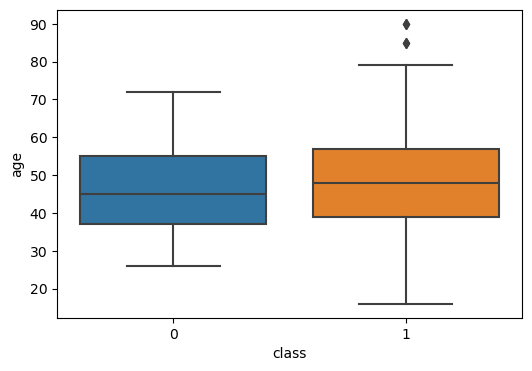

In [192]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='class', y='age', data=df)
plt.show()

In [193]:
cat_variables = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 
                 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 
                 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 
                 'muscle_stiffness', 'alopecia', 'obesity']

In [194]:
target_variable = 'class'
corr_with_target = {}

for variable in cat_variables:
    corr_with_target[variable] = cramers_v(df[variable], df[target_variable])

sorted_corr = sorted(corr_with_target.items(), key=lambda item: item[1], reverse=True)

print("Correlation with target variable 'class':")
for variable, corr in sorted_corr:
    print(f"{variable}: {corr:.4f}")

Correlation with target variable 'class':
polyuria: 0.6611
polydipsia: 0.6439
gender: 0.4434
sudden_weight_loss: 0.4307
partial_paresis: 0.4265
polyphagia: 0.3360
irritability: 0.2919
alopecia: 0.2599
visual_blurring: 0.2436
weakness: 0.2354
muscle_stiffness: 0.1101
genital_thrush: 0.0961
obesity: 0.0505
itching: 0.0000
delayed_healing: 0.0000


In [176]:
correlation_threshold = 0.1

# Фильтруем и сохраняем только те переменные, корреляция которых с целевой переменной выше порога
significant_variables = [var for var, corr in corr_with_target.items() if corr > correlation_threshold]

print("Переменные, считающиеся значимыми на основе порога корреляции Крамера:")
for var in significant_variables:
    print(f"{var}: {corr_with_target[var]:.4f}")

Переменные, считающиеся значимыми на основе порога корреляции Крамера:
gender: 0.4434
polyuria: 0.6611
polydipsia: 0.6439
sudden_weight_loss: 0.4307
weakness: 0.2354
polyphagia: 0.3360
visual_blurring: 0.2436
irritability: 0.2919
partial_paresis: 0.4265
muscle_stiffness: 0.1101
alopecia: 0.2599


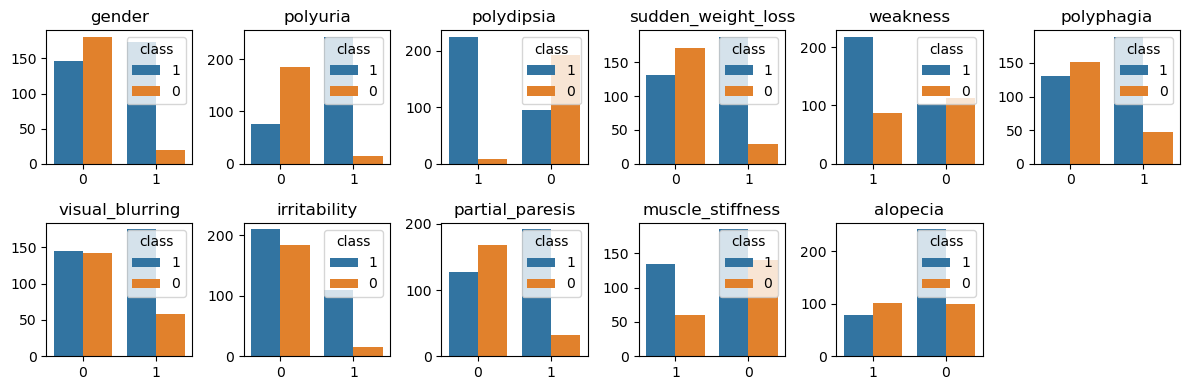

In [177]:
def plot_all_categorical_distributions(data, variables, target):
    # костыль
    data[target] = data[target].astype(str)
    for variable in variables:
        data[variable] = data[variable].astype(str)
    
    # grid
    n_cols = 6
    n_rows = len(variables) // n_cols + (len(variables) % n_cols > 0)
    
    # figures
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))
    
    if n_rows == 1:
        axs = axs.reshape(1, -1)
    elif n_cols == 1:
        axs = axs.reshape(-1, 1)
    
    for i, variable in enumerate(variables):
        row = i // n_cols
        col = i % n_cols
        ax = axs[row, col]
        sns.countplot(x=variable, hue=target, data=data, ax=ax)
        ax.set_title(variable)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend(title=target, loc='upper right')
    
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axs.flatten()[j])
    
    plt.tight_layout()
    plt.show()

# Вызов функции визуализации
plot_all_categorical_distributions(df, significant_variables, 'class')

In [195]:
from sklearn.model_selection import train_test_split


X = df[['age'] + significant_variables]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
lr = LogisticRegression(max_iter=1000)

In [197]:
param_grid_lr = {
  'penalty': ['l1', 'l2'],
  'C': [0.1, 1, 10],
  'solver': ['liblinear'] 
}

CV_model = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5)
CV_model.fit(X_train, y_train)
print('Best params (Linear Regression):', CV_model.best_params_)
print('Best score (Linear Regression):', CV_model.best_score_)

Best params (Linear Regression): {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score (Linear Regression): 0.9157773952954675


In [198]:
param_grid_rfc = {
  'n_estimators': [5, 10, 20],  # Number of trees
  'max_depth': [5, 10, 20],  # Maximum depth of the tree
  'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
  'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

rfc = RandomForestClassifier()
CV_model = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5)
CV_model.fit(X_train, y_train)
print('Best params (Random Forest):', CV_model.best_params_)
print('Best score (Random Forest):', CV_model.best_score_)

Best params (Random Forest): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best score (Random Forest): 0.9711130235226622


In [199]:
rfc_tuned = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=5)
rfc_tuned.fit(X_train, y_train)
print(rfc_tuned.score(X_test, y_test))

0.9615384615384616


In [200]:
search_space = [
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [5, 10, 20],
        'classifier__max_depth': [5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
]

pipeline = Pipeline(steps=[('classifier', LogisticRegression())])
CV_model = GridSearchCV(estimator=pipeline, param_grid=search_space, cv=5, verbose=1, n_jobs=-1)
CV_model.fit(X_train, y_train)

print('Best params:', CV_model.best_params_)
print('Best estimator:', CV_model.best_estimator_)

Fitting 5 folds for each of 87 candidates, totalling 435 fits
Best params: {'classifier': RandomForestClassifier(max_depth=10, n_estimators=10), 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10}
Best estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=10))])


In [201]:
best_model = CV_model.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



In [202]:
model = RandomForestClassifier(max_depth=20, n_estimators=20)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9807692307692307